# 데이터 불러오기

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
from torchvision import datasets, transforms
cifar10 = datasets.CIFAR10('data', 
    train=True, download=True,
    transform = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                          (0.2470, 0.2435, 0.2616))
    ])
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data


In [4]:
cifar10_val = datasets.CIFAR10(
    'data', train=False, download=True,
    transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                         (0.2470, 0.2435, 0.2616))
    ])
)

Files already downloaded and verified


In [5]:
for img, label in cifar10:
    print("img:{}, \nlabel:{}".format(img, label))
    break

img:tensor([[[-1.0531e+00, -1.3072e+00,  ...,  4.2339e-01,  3.5989e-01],
         [-1.7358e+00, -1.9899e+00,  ..., -1.0054e-01, -5.2909e-02],
         ...,
         [ 8.6794e-01,  7.5681e-01,  ..., -4.4983e-01, -6.7210e-01],
         [ 8.2031e-01,  6.7742e-01,  ...,  4.0752e-01, -3.7033e-02]],

        [[-9.8219e-01, -1.2399e+00,  ...,  3.2427e-02,  1.6322e-02],
         [-1.6586e+00, -1.9807e+00,  ..., -6.4398e-01, -5.7956e-01],
         ...,
         [ 2.5790e-01,  2.1737e-04,  ..., -9.8219e-01, -1.1271e+00],
         [ 3.3842e-01,  9.6848e-02,  ..., -8.0308e-02, -4.9904e-01]],

        [[-7.6354e-01, -1.0334e+00,  ..., -1.7890e-01, -1.6391e-01],
         [-1.4081e+00, -1.7080e+00,  ..., -9.5842e-01, -8.5348e-01],
         ...,
         [-2.6884e-01, -1.0783e+00,  ..., -1.1983e+00, -1.1983e+00],
         [ 3.0971e-02, -2.9882e-01,  ..., -4.4873e-01, -6.2862e-01]]]), 
label:6


In [6]:
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
            for img, label in cifar10
            if label in [0,2]]
cifar2_val = [(img, label_map[label])
                for img, label in cifar10_val
                if label in [0,2]]


In [7]:
len(cifar2_val)

2000

In [8]:
# img와 label이 들어있는 오브젝트
cifar2_val[0:5]

[(tensor([[[ 0.4710,  0.6615,  ...,  1.2172,  1.0585],
           [ 0.4393,  0.5980,  ...,  1.2331,  1.0108],
           ...,
           [-0.5768, -1.0373,  ..., -1.0214, -0.7991],
           [-0.5292, -1.0373,  ..., -0.9738, -0.8309]],
  
          [[ 0.5317,  0.8538,  ...,  1.2725,  0.9665],
           [ 0.5156,  0.9021,  ...,  1.4819,  1.0793],
           ...,
           [-0.6601, -1.0466,  ..., -0.9500, -0.8695],
           [-0.7245, -1.1432,  ..., -0.9339, -0.8856]],
  
          [[ 0.5257,  1.0953,  ...,  1.4701,  0.8555],
           [ 0.6456,  1.3502,  ...,  1.6949,  1.0353],
           ...,
           [-0.7785, -0.9134,  ..., -0.8985, -0.9434],
           [-0.7485, -0.9434,  ..., -0.9284, -0.9584]]]), 0),
 (tensor([[[-0.5610, -0.5610,  ..., -0.4022, -0.4022],
           [-0.5292, -0.5133,  ..., -0.3546, -0.3704],
           ...,
           [-0.4022, -0.3863,  ..., -0.5610, -0.5610],
           [-0.4181, -0.4022,  ..., -0.5610, -0.5768]],
  
          [[ 0.0163,  0.0163,  ...,  

# 모델 만들기

In [ ]:
connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2)
)

In [ ]:
numel_list = [p.numel()
                for p in connected_model.parameters()
                if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1)
)

In [ ]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [ ]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [ ]:
conv = nn.Conv2d(3, 16, kernel_size = 3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [ ]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

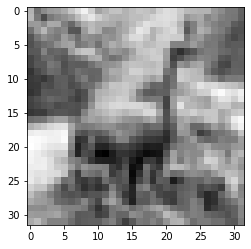

In [ ]:
plt.imshow(img.mean(0), cmap='gray')
plt.show()

# 경계 패딩하기
- 위의 사진에서 32 x 32가 conv 신경망에 들어갔다 나올 경우 30 x 30 사이즈 사진으로 변경됨
- 원본 크기를 유지하기 위해 경계에 0인 값을 추가함 -> 패딩

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size = 3, padding = 1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

# 컨볼루션으로 피처 찾아내기


In [ ]:
# bias를 0으로 제거해 교란 변수 배제
with torch.no_grad():
    conv.bias.zero_()

In [ ]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

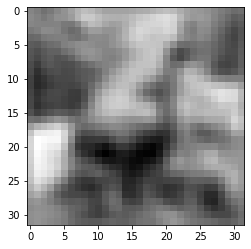

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size = 3, padding = 1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

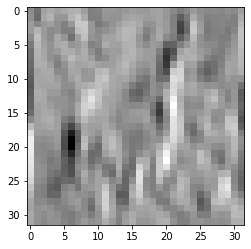

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [ ]:
# model = nn.Sequential(
#     nn.Conv2d(3, 16, kernel_size=3, padding=1),
#     nn.Tanh(),
#     nn.MaxPool2d(2),
#     nn.Conv2d(16, 8, kernel_size=3, padding=1),
#     nn.Tanh(),
#     nn.MaxPool2d(2),
#     ...
# )

TypeError: ignored

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # WARNING: something missing here
            nn.Linear(512, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [ ]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
# conv에서 선형층에 들어갈 fc 레이어가 없으므로 오류가 발생
model(img.unsqueeze(0))

RuntimeError: ignored

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = Net()

sum([p.numel() for p in model.parameters()])

18090

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out



In [ ]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0157,  0.1143]], grad_fn=<AddmmBackward0>)

# 훈련 루프 만들기
1. 모델에 입력값을 넣음(순방향 전달)
2. 손실값을 계산(마찬가지로 순방향 전달)
3. 이전 기울기 값을 0으로 리셋
4. loss.backward()를 호출하여 모든 파라미터에 대한 손실값의 기울기를 계산(역방향 전달)
5. 옵티마이저를 통해 손실값을 낮추어 파라미터를 조정하도록 함

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out



In [ ]:
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 30

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.725090
Epoch: 1, Loss: 0.732874
Epoch: 2, Loss: 0.307092
Epoch: 3, Loss: 0.503768
Epoch: 4, Loss: 0.222427
Epoch: 5, Loss: 0.384263
Epoch: 6, Loss: 0.477116
Epoch: 7, Loss: 0.312651
Epoch: 8, Loss: 0.363861
Epoch: 9, Loss: 0.167472
Epoch: 10, Loss: 0.203699
Epoch: 11, Loss: 0.370111
Epoch: 12, Loss: 0.083800
Epoch: 13, Loss: 0.529598
Epoch: 14, Loss: 0.448480
Epoch: 15, Loss: 0.561713
Epoch: 16, Loss: 0.177016
Epoch: 17, Loss: 0.370294
Epoch: 18, Loss: 0.193951
Epoch: 19, Loss: 0.306731
Epoch: 20, Loss: 0.092308
Epoch: 21, Loss: 0.152187
Epoch: 22, Loss: 0.106162
Epoch: 23, Loss: 0.123904
Epoch: 24, Loss: 0.371606
Epoch: 25, Loss: 0.347893
Epoch: 26, Loss: 0.151956
Epoch: 27, Loss: 0.428145
Epoch: 28, Loss: 0.457404
Epoch: 29, Loss: 0.149459


# 훈련 루프를 만들어 학습시키기

In [ ]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1): # 에포크 숫자는 0대신, 부터 n_epochs까지 루프를 돌며 부여
        loss_train = 0.0
        for imgs, labels in train_loader: # 데이터 로더가 만들어준 배치 안에서 데이터셋을 순회

            outputs = model(imgs) # 모델에 배치를 넣어줌

            loss = loss_fn(outputs, labels) # 최소화하려는 손실값 계산

            optimizer.zero_grad() # 마지막에 이전 기울기 값 지움
            
            loss.backward() # 역전파 수행. 즉 신경망이 학습할 모든 파라미터에 대한 기울기를 계산함

            optimizer.step() # 모델 업데이트

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 ==0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader))) # 배치 단위의 평균 손실ㄱ밧을 구하기 위해 훈련 데이터 로더의 길이로 나눔

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2022-08-09 05:58:26.764260 Epoch 1, Training loss 0.6450566436834396
2022-08-09 05:58:52.338203 Epoch 10, Training loss 0.33142413977225116
2022-08-09 05:59:20.642995 Epoch 20, Training loss 0.2879250012575441
2022-08-09 05:59:49.590057 Epoch 30, Training loss 0.2602748027083221
2022-08-09 06:00:18.170863 Epoch 40, Training loss 0.23994055921864357
2022-08-09 06:00:46.438385 Epoch 50, Training loss 0.222550317597617
2022-08-09 06:01:14.958211 Epoch 60, Training loss 0.20289165574084422
2022-08-09 06:01:43.786958 Epoch 70, Training loss 0.18581666636049368
2022-08-09 06:02:12.276863 Epoch 80, Training loss 0.16297703281424608
2022-08-09 06:02:40.161968 Epoch 90, Training loss 0.1392177503532285
2022-08-09 06:03:09.215743 Epoch 100, Training loss 0.11834308403028045


In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad(): # 파라미터를 업데이트 하지 않으므로 기울기는 x
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # 가장 높은 값을 가진 인덱스를 출력
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print("Accuracy {}: {:.2f}".format(name, correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.96
Accuracy val: 0.90


In [ ]:
# 모델 저장하고 불러오기
data_path = './'
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [ ]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

# GPU에서 훈련시키기

In [32]:
# GPU에서 훈련시키기
# .to 메소드를 사용하여 데이터 로더에서 얻은 텐서를 GPU로 옮길 수 있음
device = (torch.device('cuda') if torch.cuda.is_available()
        else torch.device("cpu"))

print(f"Training on device {device}.")

Training on device cuda.


In [33]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


In [34]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0

        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))
            

In [35]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

In [36]:
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
    
)

2022-08-10 04:39:05.348007 Epoch 1, Training loss 0.6117963876314224


KeyboardInterrupt: ignored

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

all_acc_dict = collections.OrderedDict()

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad(): # 파라미터를 업데이트 하지 않으므로 기울기는 x
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # 가장 높은 값을 가진 인덱스를 출력
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.98
Accuracy val: 0.89


In [ ]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt', map_location=device))

<All keys matched successfully>

# 메모리 용량 늘리기
- 기존 Net 방식에 비해 NetWidth로 모델의 용량을 늘릴 경우 직접적으로 파라미터 수에 영향을 미친다.

- 18090 -> 38386으로 증가 
- 용량이 클수록 모델이 다룰 수 있는 입력이 더 다양해지지만 과적합의 가능성도 커짐

In [ ]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size = 3, padding = 1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetWidth().to(device = device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

validate(model, train_loader, val_loader)

2022-08-09 06:25:42.916226 Epoch 1, Training loss 0.5446608104523579
2022-08-09 06:25:46.762873 Epoch 10, Training loss 0.31771098599312414
2022-08-09 06:25:50.769609 Epoch 20, Training loss 0.2771999941557456
2022-08-09 06:25:55.184893 Epoch 30, Training loss 0.24351850612338183
2022-08-09 06:25:59.201050 Epoch 40, Training loss 0.21262693381423403
2022-08-09 06:26:03.215639 Epoch 50, Training loss 0.189683297589706
2022-08-09 06:26:07.227940 Epoch 60, Training loss 0.16590646300820788
2022-08-09 06:26:11.264228 Epoch 70, Training loss 0.14507665731914485
2022-08-09 06:26:15.896683 Epoch 80, Training loss 0.12897895259936903
2022-08-09 06:26:19.899681 Epoch 90, Training loss 0.11058942513291244
2022-08-09 06:26:23.900912 Epoch 100, Training loss 0.09488496685009094
Accuracy train: 0.97
Accuracy val: 0.88


{'train': 0.9721, 'val': 0.8755}

In [ ]:
# 하드코딩을 피하기 위해 파라미터를 init에 전달하고 너비를 파라미터화해서 forward 함수에서 view를 호출할때 고려
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


In [ ]:
model = NetWidth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2022-08-09 06:39:17.565175 Epoch 1, Training loss 0.543719344458003
2022-08-09 06:39:21.194661 Epoch 10, Training loss 0.31558518700159277
2022-08-09 06:39:25.642185 Epoch 20, Training loss 0.2709045668316495
2022-08-09 06:39:31.424065 Epoch 30, Training loss 0.2354833569116653
2022-08-09 06:39:37.698685 Epoch 40, Training loss 0.20489382098434836
2022-08-09 06:39:41.751945 Epoch 50, Training loss 0.18144382562512046
2022-08-09 06:39:45.812820 Epoch 60, Training loss 0.15978616153358655
2022-08-09 06:39:49.839849 Epoch 70, Training loss 0.13844143300299433
2022-08-09 06:39:53.890611 Epoch 80, Training loss 0.12034989644292814
2022-08-09 06:39:57.919737 Epoch 90, Training loss 0.10166241582127133
2022-08-09 06:40:01.948648 Epoch 100, Training loss 0.08591921718874175
Accuracy train: 0.97
Accuracy val: 0.90


In [ ]:
sum(p.numel() for p in model.parameters())

38386

# 과적합을 제어하기 위한 방법
- 파라미터 제어하기(가중치 페널티)
- L2 정규화는 값을 0에 가깝게 만들고 L1 정규화는 값을 0으로 만듦

In [ ]:
# l2 정규화
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                            for p in model.parameters()) # L1 정규화라면 pow(2.0)을 abs()로 바꾼다.
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))
            

In [ ]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)


2022-08-09 06:50:50.172054 Epoch 1, Training loss 0.6458339698755058
2022-08-09 06:50:54.647261 Epoch 10, Training loss 0.3675040579905176
2022-08-09 06:50:59.552220 Epoch 20, Training loss 0.3130934677875725
2022-08-09 06:51:04.498663 Epoch 30, Training loss 0.2821114920316988
2022-08-09 06:51:09.486486 Epoch 40, Training loss 0.2649192792025341
2022-08-09 06:51:14.422614 Epoch 50, Training loss 0.2417831770174063
2022-08-09 06:51:19.378514 Epoch 60, Training loss 0.22251712250861394
2022-08-09 06:51:24.279744 Epoch 70, Training loss 0.20385571369889435
2022-08-09 06:51:29.424704 Epoch 80, Training loss 0.18893677997551148
2022-08-09 06:51:36.843347 Epoch 90, Training loss 0.17324387163493285
2022-08-09 06:51:43.114490 Epoch 100, Training loss 0.16334984646101666
Accuracy train: 0.96
Accuracy val: 0.89


In [ ]:
# l1 정규화
def training_loop_l1reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            
            l1_lambda = 0.001
            l1_norm = sum(abs(p).sum() for p in model.parameters())
            loss = loss + l1_lambda * l1_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))


In [ ]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l1reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["l1 reg"] = validate(model, train_loader, val_loader)

2022-08-09 06:59:39.583754 Epoch 1, Training loss 1.088607148759684
2022-08-09 06:59:44.059124 Epoch 10, Training loss 0.6036518180066612
2022-08-09 06:59:49.041875 Epoch 20, Training loss 0.45812241002252907
2022-08-09 06:59:53.684334 Epoch 30, Training loss 0.4060668276183924
2022-08-09 06:59:58.397271 Epoch 40, Training loss 0.38559006610114105
2022-08-09 07:00:03.097151 Epoch 50, Training loss 0.37110278010368347
2022-08-09 07:00:07.821155 Epoch 60, Training loss 0.3574239601185367
2022-08-09 07:00:12.572609 Epoch 70, Training loss 0.34679545367219644
2022-08-09 07:00:17.295500 Epoch 80, Training loss 0.3450649571456727
2022-08-09 07:00:21.985524 Epoch 90, Training loss 0.33976672466393487
2022-08-09 07:00:26.731773 Epoch 100, Training loss 0.33099212549674284
Accuracy train: 0.88
Accuracy val: 0.87


In [ ]:
# 입력 하나에 의존하지 않기 : 드롭아웃
# 신경망의 뉴련 출력을 랜덤하게 0으로 만드는 작업
# Dropout 모듈은 model.train에서만 사용되며 eval로 바꿀시 작동되지 않음
class NetDropOut(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        #print("out1:",out.shape)
        out = self.conv1_dropout(out)
        #print("out2:",out.shape)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        #print("out3:",out.shape)
        out = self.conv2_dropout(out)
        #print("out4:",out.shape)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        #print("out5:",out.shape)
        out = torch.tanh(self.fc1(out))
        #print("out6:",out.shape)
        out = self.fc2(out)
        #print("out7:",out.shape)
        return out

In [ ]:
model = NetDropOut(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2022-08-09 07:16:17.121078 Epoch 1, Training loss 0.5671615427846362
2022-08-09 07:16:20.971091 Epoch 10, Training loss 0.37466975021514165
2022-08-09 07:16:25.209308 Epoch 20, Training loss 0.34954154349056776
2022-08-09 07:16:29.456216 Epoch 30, Training loss 0.3284603664829473
2022-08-09 07:16:33.685773 Epoch 40, Training loss 0.31090078706953933
2022-08-09 07:16:37.950210 Epoch 50, Training loss 0.30299587652182125
2022-08-09 07:16:43.247023 Epoch 60, Training loss 0.2907918722956044
2022-08-09 07:16:48.671264 Epoch 70, Training loss 0.2749902554283476
2022-08-09 07:16:53.766574 Epoch 80, Training loss 0.2655346029123683
2022-08-09 07:16:58.817690 Epoch 90, Training loss 0.25622012399753946
2022-08-09 07:17:03.541018 Epoch 100, Training loss 0.24189976123487875
Accuracy train: 0.90
Accuracy val: 0.88


In [ ]:
# 활성 함수 억제하기 : 배치 정규화
# 입력 범위를 신경망의 활성 함수로 바꿔서 미니 배치가 원하는 분포를 가지게 하는 것
# model.eval()을 명시할 경우 Batchnorm은 추정값을 고정하고 정규화에 사용하기만 한다.
# model.train()에서는 미니 배치 통계를 추정해나간다.
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size = 3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                              padding = 1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features = n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2022-08-09 07:24:12.003735 Epoch 1, Training loss 0.4690707751140473
2022-08-09 07:24:16.339746 Epoch 10, Training loss 0.2724626400288503
2022-08-09 07:24:21.078298 Epoch 20, Training loss 0.21137673583379976
2022-08-09 07:24:25.834919 Epoch 30, Training loss 0.1633817847272393
2022-08-09 07:24:30.807659 Epoch 40, Training loss 0.1213203434873918
2022-08-09 07:24:35.995956 Epoch 50, Training loss 0.09809114017589077
2022-08-09 07:24:40.769411 Epoch 60, Training loss 0.06928105553861257
2022-08-09 07:24:45.898372 Epoch 70, Training loss 0.05489846829111409
2022-08-09 07:24:50.724639 Epoch 80, Training loss 0.03803914791317123
2022-08-09 07:24:55.579433 Epoch 90, Training loss 0.02641152143241114
2022-08-09 07:25:00.792993 Epoch 100, Training loss 0.018417789222625127
Accuracy train: 0.99
Accuracy val: 0.88


In [ ]:
# 복잡한 구조를 배우기 위해 깊이 파헤치기 : 깊이
# 스킵 커넥션을 이용하여 층을 깊게 쌓을 수 있음
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2022-08-09 07:32:32.386145 Epoch 1, Training loss 0.6781227550688823
2022-08-09 07:32:36.408308 Epoch 10, Training loss 0.3458823670817029
2022-08-09 07:32:40.882270 Epoch 20, Training loss 0.2986293742136591
2022-08-09 07:32:45.304474 Epoch 30, Training loss 0.2804905544420716
2022-08-09 07:32:49.751661 Epoch 40, Training loss 0.2469704079020555
2022-08-09 07:32:54.185865 Epoch 50, Training loss 0.22056304668165316
2022-08-09 07:32:58.651304 Epoch 60, Training loss 0.19126876263291973
2022-08-09 07:33:03.078603 Epoch 70, Training loss 0.16754838195481117
2022-08-09 07:33:07.861256 Epoch 80, Training loss 0.14626860581812964
2022-08-09 07:33:12.285560 Epoch 90, Training loss 0.12669015962891517
2022-08-09 07:33:17.012297 Epoch 100, Training loss 0.10246164301873013
Accuracy train: 0.97
Accuracy val: 0.91


In [ ]:
# 레즈넷처럼 스킵커넥션을 이 모델에 추가하는 것은 forward 함수의 첫 번째 계층의 출력을 세번째 계층의 입력에 추가하는 것과 같음
# 피드 포워드 경로에 추가적으로 첫 번째 활성 함수의 출력을 마지막 부분의 입력으로 사용하는 것
# 아이덴티티 매핑이라고 부름
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2022-08-09 07:43:25.259090 Epoch 1, Training loss 0.6215892067760419
2022-08-09 07:43:29.266979 Epoch 10, Training loss 0.32199219761380726
2022-08-09 07:43:33.718903 Epoch 20, Training loss 0.27042439546744534
2022-08-09 07:43:38.187110 Epoch 30, Training loss 0.23569526395220666
2022-08-09 07:43:42.653256 Epoch 40, Training loss 0.20326548055478721
2022-08-09 07:43:47.093259 Epoch 50, Training loss 0.1758072045483407
2022-08-09 07:43:51.480613 Epoch 60, Training loss 0.15520867245022657
2022-08-09 07:43:56.900032 Epoch 70, Training loss 0.12604851842780782
2022-08-09 07:44:02.444476 Epoch 80, Training loss 0.10601136345819683
2022-08-09 07:44:06.872682 Epoch 90, Training loss 0.08191664228631053
2022-08-09 07:44:11.265832 Epoch 100, Training loss 0.07897366736392686
Accuracy train: 0.96
Accuracy val: 0.89


In [ ]:
# 파이토치로 매우 깊은 모델 만들기

# 7장 연습문제
지금까지 다룬 모델을 nn.Conv2d 생성자에 kernel_size=5를 넣어 5 x 5 커널을 사용하도록 바꾸자

### a. 이렇게 바꾼 경우 모델의 파라미터 수는 어떻게 바뀌는가? 

kernel_size 3 : 18090, kernel_size 5 : 13768로 kernel_size가 커졌을 경우 요구하는 파라미터 수가 적어짐

### b. 바꾼 후에 과적합은 개선되는가 혹은 나빠지는가? 

kernel 3 일때 train, val : 0.96, 0.89
kernel 5 일때 train, val : 1.00, 0.90

train 세트의 성능이 오르면서 validation 세트의 성능도 올랐으나 train 세트의 accuracy가 1인 것으로 보아 과적합이 발생한 것 같음

### c. https://pytorch.org/docs/stable/nn.html#conv2d를 읽어보라.

### d. kernel_size=(1,3)을 설명할 수 있는가?



### e. 이런 커널을 사용하면 모델은 어떻게 동작하는가?

In [117]:
import torch 
import torch.nn as nn
import torch.nn.functional as F


train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [125]:
# kernel_size를 5로 바꿈으로써 batch_size가 36이됨

import torch 
import torch.nn as nn
import torch.nn.functional as F


train_loader = torch.utils.data.DataLoader(cifar2, batch_size=36, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=5, padding=1)
        self.fc1 = nn.Linear(8 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 6 * 6)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out



In [138]:
# kernel_size가 (1, 3) 배치 사이즈가 72
import torch 
import torch.nn as nn
import torch.nn.functional as F
# kernel_size를 5로 바꿈으로써 batch_size가 36이됨

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=72, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=(1,3), padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=(1,3), padding=1)
        self.fc1 = nn.Linear(8 * 72, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 72)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [139]:
# GPU에서 훈련시키기
# .to 메소드를 사용하여 데이터 로더에서 얻은 텐서를 GPU로 옮길 수 있음
device = (torch.device('cuda') if torch.cuda.is_available()
        else torch.device("cpu"))

print(f"Training on device {device}.")

Training on device cuda.


In [140]:
import datetime

def training_loop(epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, epochs+1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad() # 옵티마이저 초기화 하기
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoech {} loss 값은 {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader)))

In [141]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [142]:
training_loop(
    epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2022-08-10 05:28:47.720878 Epoech 1 loss 값은 0.6474244487371376
2022-08-10 05:28:50.506479 Epoech 10 loss 값은 0.3919416410888699
2022-08-10 05:28:53.593632 Epoech 20 loss 값은 0.34473643285765065
2022-08-10 05:28:57.900544 Epoech 30 loss 값은 0.3184044522990426
2022-08-10 05:29:02.330377 Epoech 40 loss 값은 0.3028104577561934
2022-08-10 05:29:06.075350 Epoech 50 loss 값은 0.28288490759383
2022-08-10 05:29:09.149669 Epoech 60 loss 값은 0.2657186730945711
2022-08-10 05:29:12.460683 Epoech 70 loss 값은 0.24705260691882894
2022-08-10 05:29:15.786748 Epoech 80 loss 값은 0.22789911561303858
2022-08-10 05:29:19.150374 Epoech 90 loss 값은 0.20585951026823882
2022-08-10 05:29:23.507530 Epoech 100 loss 값은 0.18828505915489127


In [143]:
sum([p.numel() for p in model.parameters()])

19082

In [162]:
valid_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad(): # 파라미터를 업데이트 하지 않으므로 기울기는 x
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # 가장 높은 값을 가진 인덱스를 출력 # 열방향
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name, correct / total))

In [163]:
validate(
    model = model,
    train_loader = train_loader,
    val_loader = valid_loader,
)

72
144
216
288
360
432
504
576
648
720
792
864
936
1008
1080
1152
1224
1296
1368
1440
1512
1584
1656
1728
1800
1872
1944
2016
2088
2160
2232
2304
2376
2448
2520
2592
2664
2736
2808
2880
2952
3024
3096
3168
3240
3312
3384
3456
3528
3600
3672
3744
3816
3888
3960
4032
4104
4176
4248
4320
4392
4464
4536
4608
4680
4752
4824
4896
4968
5040
5112
5184
5256
5328
5400
5472
5544
5616
5688
5760
5832
5904
5976
6048
6120
6192
6264
6336
6408
6480
6552
6624
6696
6768
6840
6912
6984
7056
7128
7200
7272
7344
7416
7488
7560
7632
7704
7776
7848
7920
7992
8064
8136
8208
8280
8352
8424
8496
8568
8640
8712
8784
8856
8928
9000
9072
9144
9216
9288
9360
9432
9504
9576
9648
9720
9792
9864
9936
10000
Accuracy train: 0.92
64
128
192
256
320
384
448
512
576
640
704
768
832
896
960
1024
1088
1152
1216
1280
1344
1408
1472
1536
1600
1664
1728
1792
1856
1920
1984
2000
Accuracy val: 0.89
